In [1]:
#TRAINING AND PREDICTION 
%%capture
!pip install graphviz

In [63]:
data1=pd.read_csv(r"C:\Users\sonas\Downloads\datafile (1).csv")
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import export_graphviz
import graphviz

# Split the data into input features (X) and target variable (y)
X = data1[['Cost_A2_FL', 'Cost_C2', 'Cost_Production']]
y = data1['Yield']


In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# Train the models
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(),
    'Random Forest': RandomForestRegressor()
}

predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)

# Evaluate the models
evaluation = {}
for model_name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evaluation[model_name] = {'MSE': mse, 'MAE': mae}

# Visualize the decision tree model using Graphviz
dot_data = export_graphviz(models['Decision Tree'], out_file=None,
                           feature_names=X.columns, filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)

# Display the Graphviz visualization
graph.render(filename='decision_tree', format='png', cleanup=True)

# Visualize the results
fig = go.Figure()
for model_name, y_pred in predictions.items():
    fig.add_trace(go.Scatter(
        x=y_test.index,
        y=y_pred,
        mode='markers',
        name=model_name
    ))
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='markers',
    name='Actual'
))
fig.update_layout(
    title='Crop Yield Prediction',
    xaxis_title='Data Point',
    yaxis_title='Yield',
)
fig.show()

# Display the evaluation results
print('Evaluation Results:')
for model_name, metrics in evaluation.items():
    print(f'{model_name}:')
    print(f'MSE: {metrics["MSE"]}')
    print(f'MAE: {metrics["MAE"]}')
    print('---')

Evaluation Results:
Decision Tree:
MSE: 130.28346000000008
MAE: 7.134000000000002
---
Linear Regression:
MSE: 28230.054046904657
MAE: 124.1650703739479
---
XGBoost:
MSE: 113.11858814325804
MAE: 6.5234736404419
---
Random Forest:
MSE: 3452.3139401310013
MAE: 22.243550000000006
---


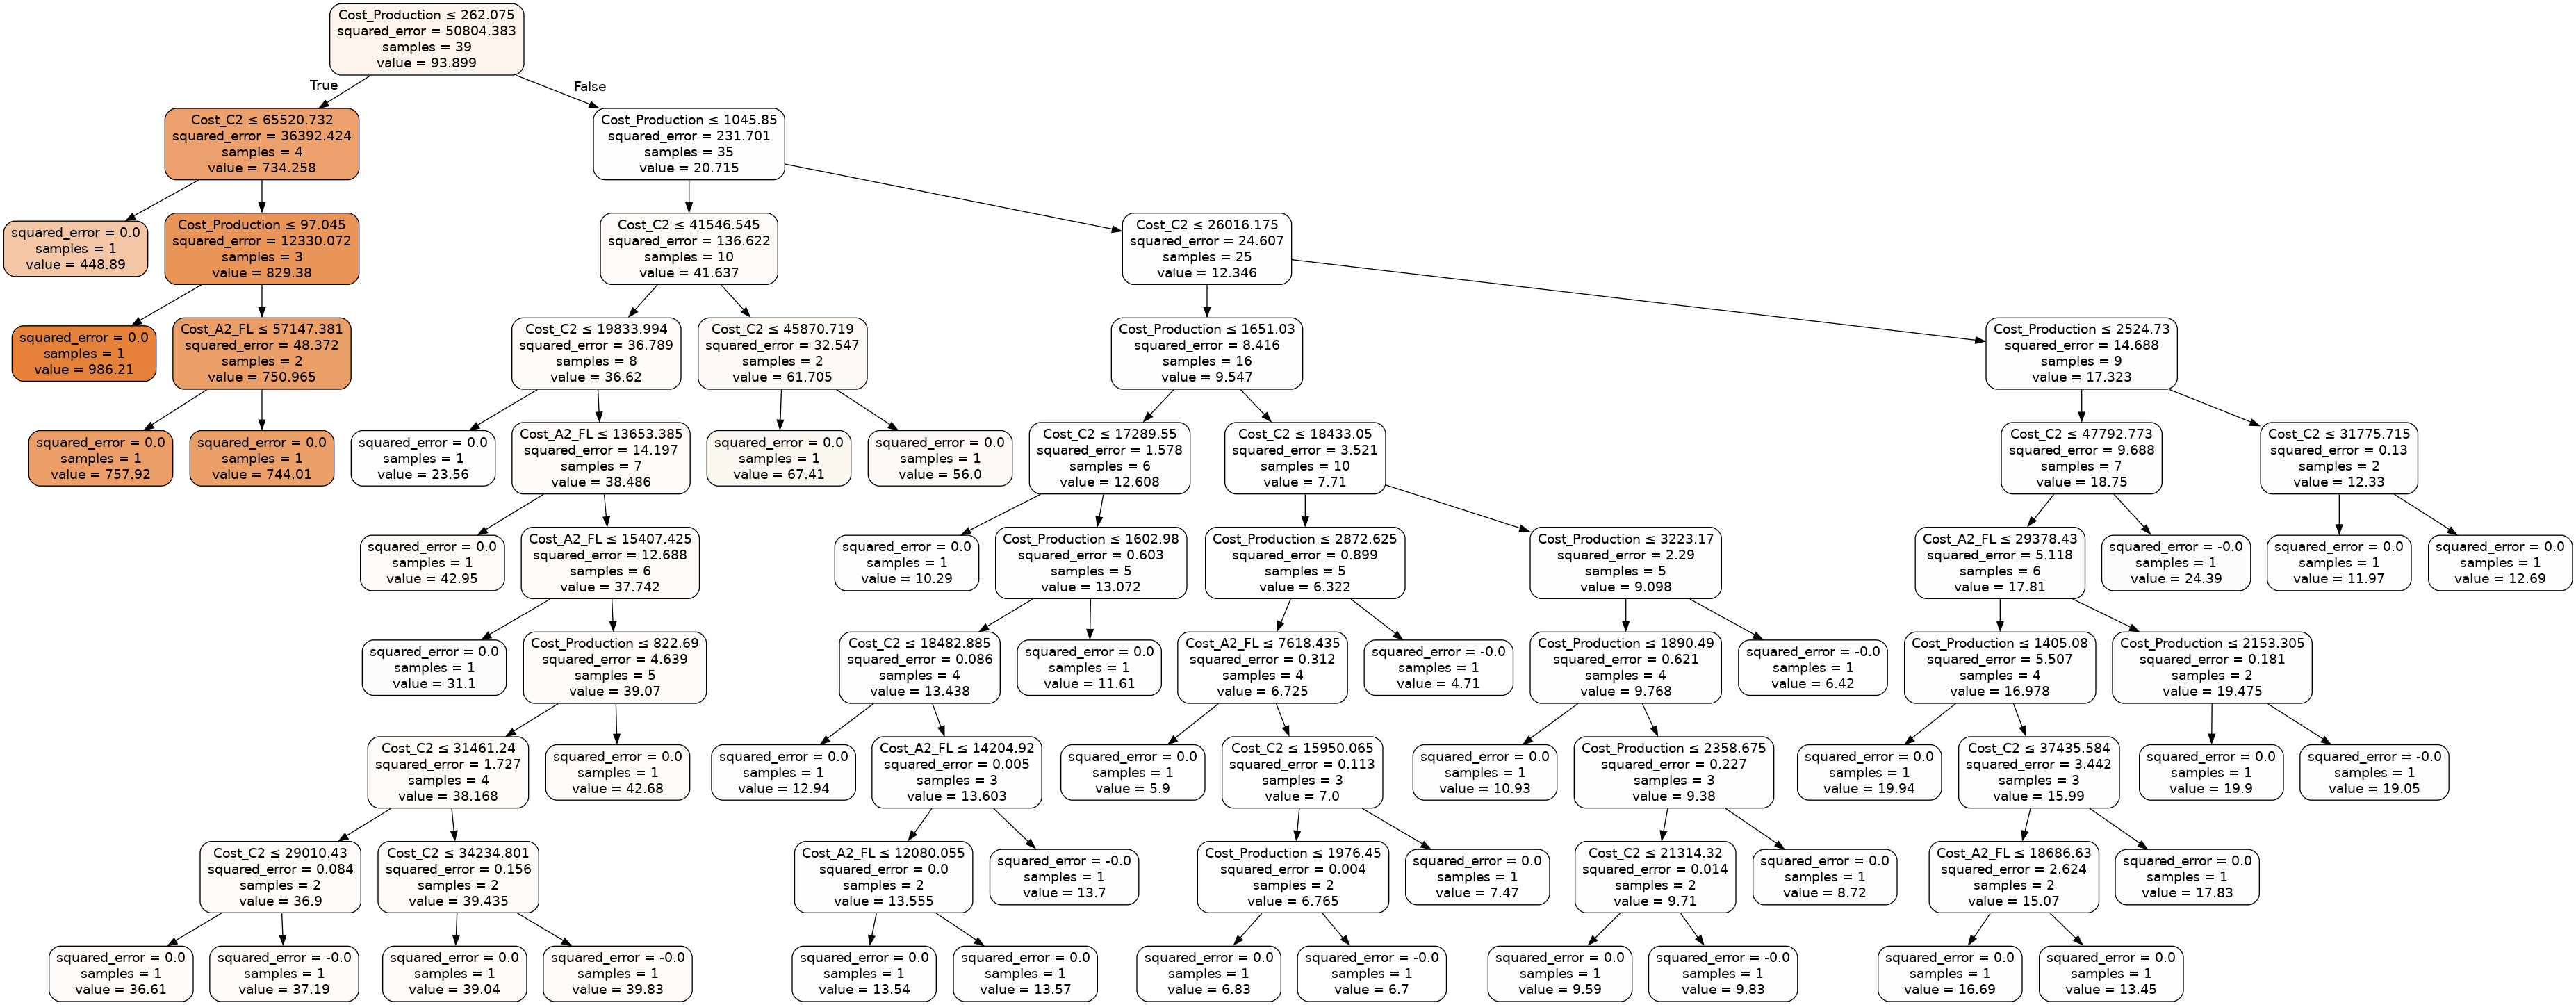

In [66]:
import graphviz
from IPython.display import Image, display

# Create a Graphviz object from the dot file
graph = graphviz.Source(dot_data)

# Set the format and filename to save the image
image_format = 'png'
image_filename = 'graph'

# Save the Graphviz visualization as an image
graph.format = image_format
graph.render(filename=image_filename, format=image_format, cleanup=True)

# Display the image with a specific size
image_path = f'{image_filename}.{image_format}'
display(Image(filename=image_path, width=1000, height=800))


# Large graphviz on this part

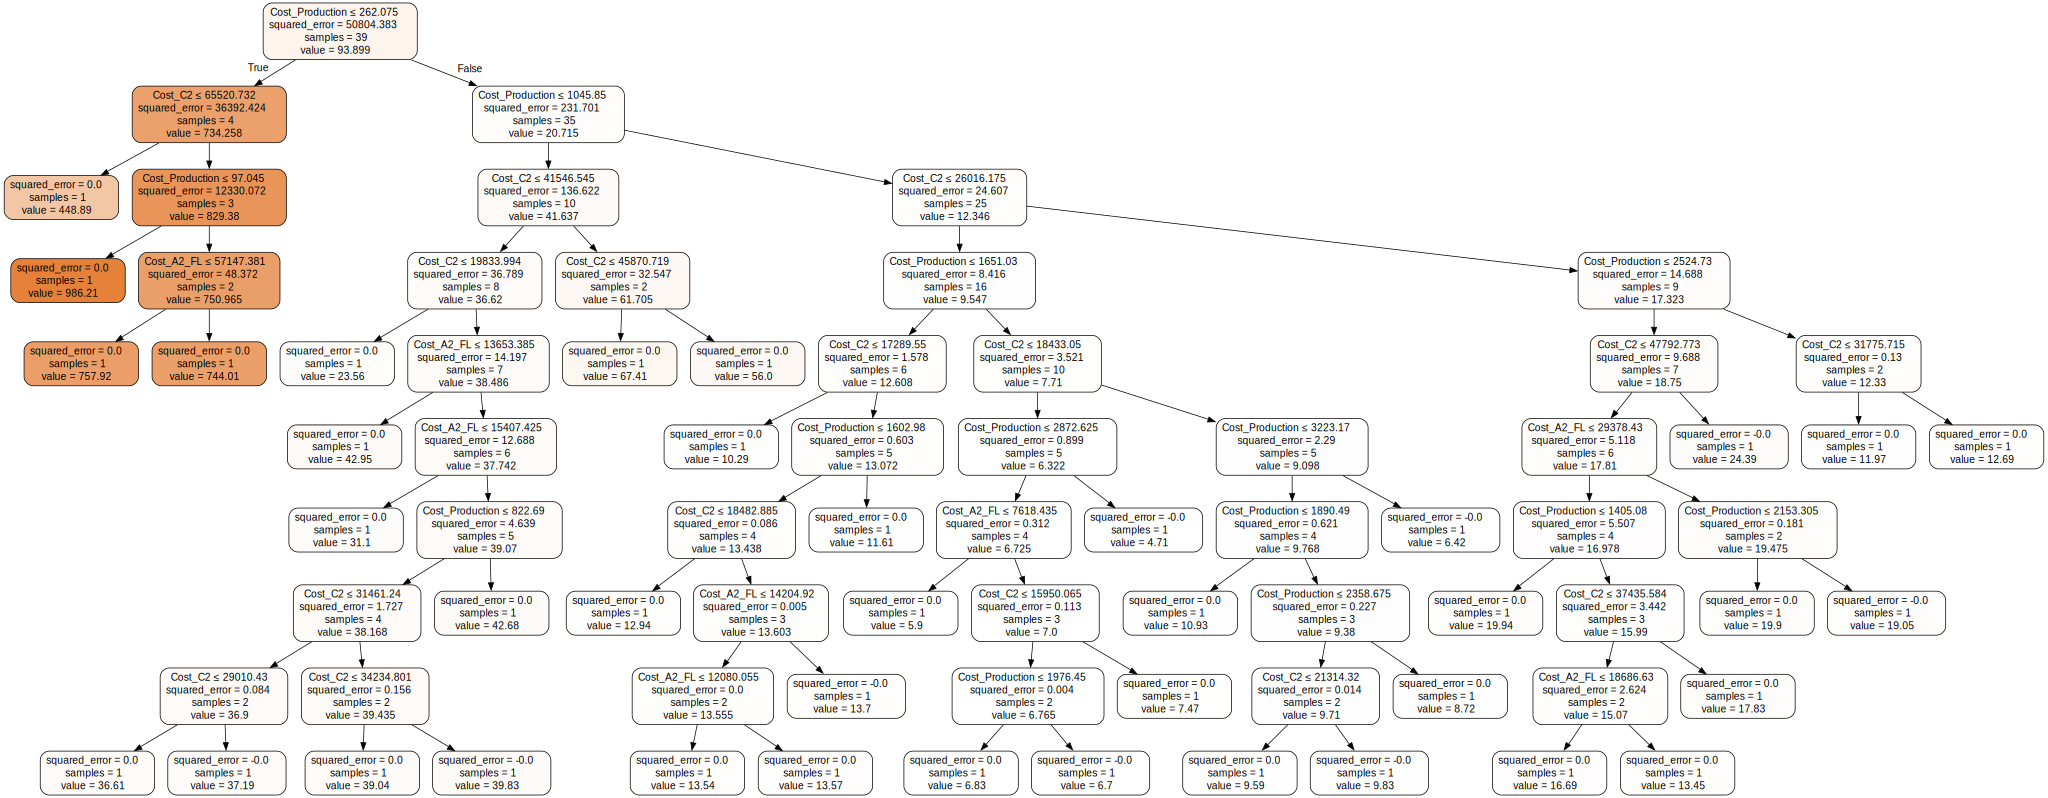

In [67]:
import graphviz
from IPython.display import display

# Create a Graphviz object from the dot file
graph = graphviz.Source(dot_data)

# Display the graph
display(graph)
